In [1]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#all_regions listing of every excel file to be used for charting by region
all_regions = ['Total_immigration_by_decade','African_Immigration','Asian_Immigration','Caribbean_Immigration',
               'Central_Am_Immigration','European_Immigration','Oceania_Immigration','South_Am_Immigration'] 
#not including Not_Spec_Immigration' 

In [3]:
appended_data = []
for region in all_regions:
    region_df = pd.read_excel('Data/Immigration_data_by_Region/'+region+'.xlsx') #convert every file to df
    region_df = region_df.drop(region_df.index[19:39])#drop the latest individual years(just keep immigration by decade)
    region_df.set_index('Decade_beginning', inplace = True) #set index as decade beginning
    region_df = region_df.iloc[:,-1] #just keep totals by region to join dfs later
    region_df = region_df.to_frame() #convert to df(previously were pandas series)
    regions = region_df.rename(columns={region_df.columns[-1]: region }) #rename the total columns as that region's name
    appended_data.append(regions) #append all data to list
    regions = pd.concat(appended_data, axis=1, join='inner') #concatenate all dfs to make one large df
    regions.index= regions.index.astype(str) #change to str for date time format
    regions.index = pd.to_datetime(regions.index) #convert index to correct date time for future slicing
    

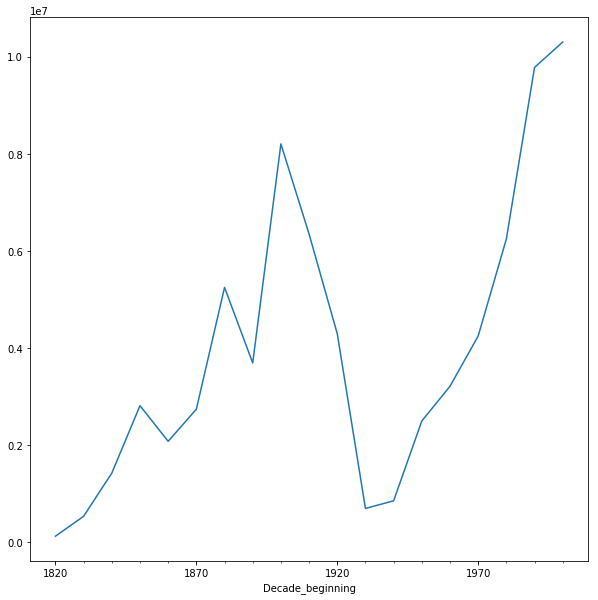

In [4]:
total_immigration = regions.Total_immigration_by_decade#.to_frame()
total_immigration.plot(figsize = (10,10))

In [5]:
total_immigration.head()

Decade_beginning
1820-01-01     128502
1830-01-01     538381
1840-01-01    1427337
1850-01-01    2814554
1860-01-01    2081261
Name: Total_immigration_by_decade, dtype: object

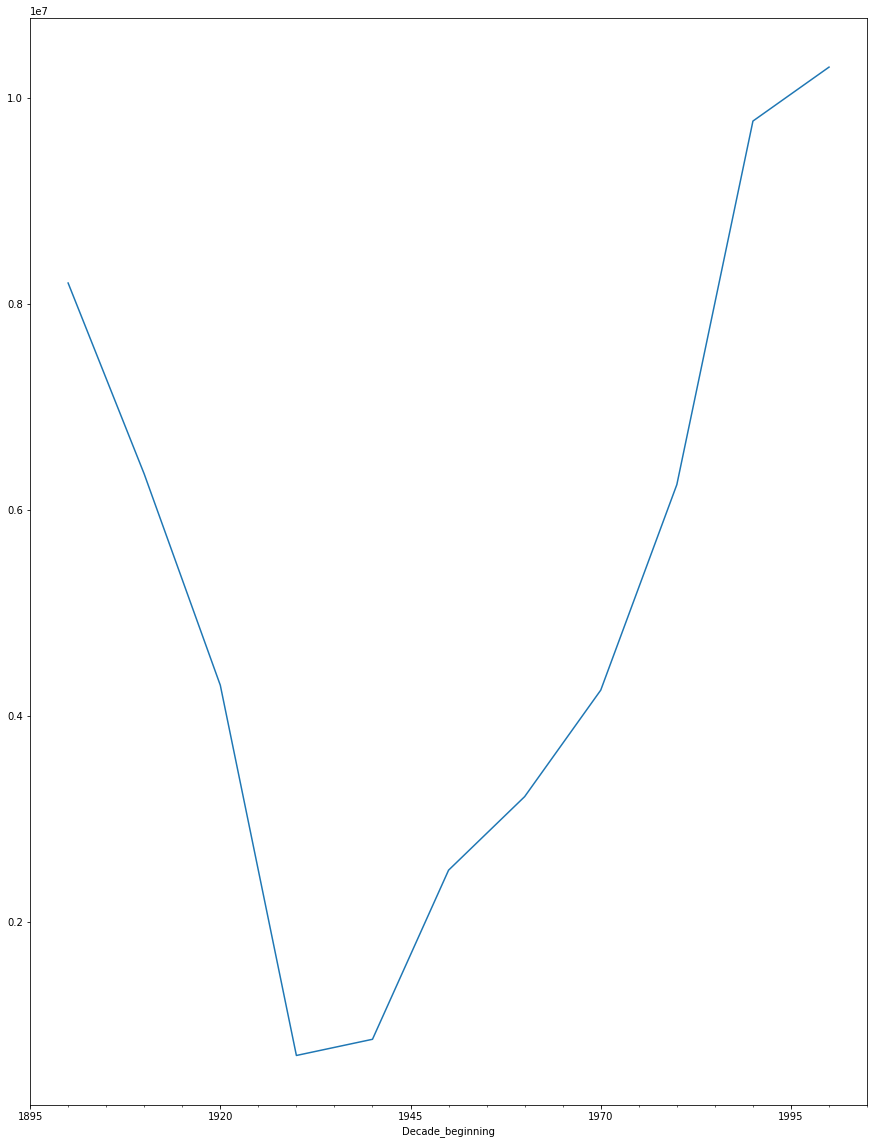

In [6]:
total_immigration = total_immigration['1900':]
total_immigration.plot(figsize = (15,20)) #checking to see if sliced correctly

In [7]:
total_immigration

Decade_beginning
1900-01-01     8202388
1910-01-01     6347380
1920-01-01     4295510
1930-01-01      699375
1940-01-01      856608
1950-01-01     2499268
1960-01-01     3213749
1970-01-01     4248203
1980-01-01     6244379
1990-01-01     9775398
2000-01-01    10299430
Name: Total_immigration_by_decade, dtype: object

# Groupby in Timeseries - didn't work (try later)

In [12]:
immigration_annual = pd.DataFrame()
year_groups = total_immigration.groupby(pd.Grouper(freq = 'D'))
year_groups

In [6]:
#below didn't work
# for yr, group in year_groups:
#     immigration_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
# immigration_annual.plot(figsize = (13,8), subplots=True, legend=True)
# plt.show()

# Histogram - not very informative

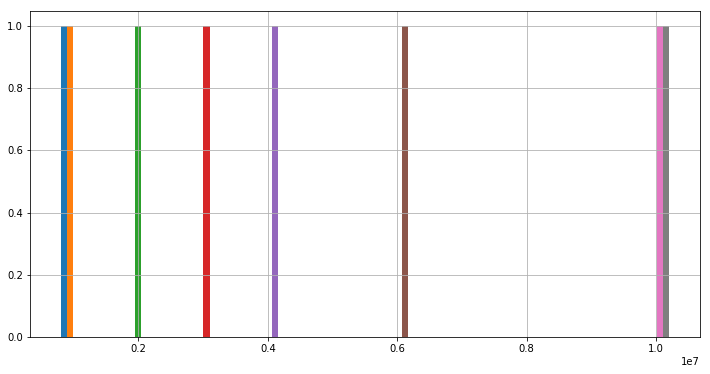

In [13]:
#not informative
total_immigration.hist(figsize = (12,6))

# Kernel Density Estimate plot 

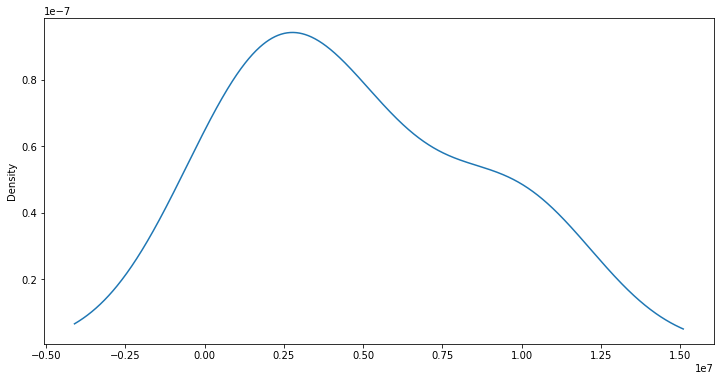

In [14]:
total_immigration.plot(kind='kde', figsize = (12,6))

# Graphing Rolling Mean and SD

## Question to research:
- Which window to use? The more windows, the shorter the rolling mean and SD graphed

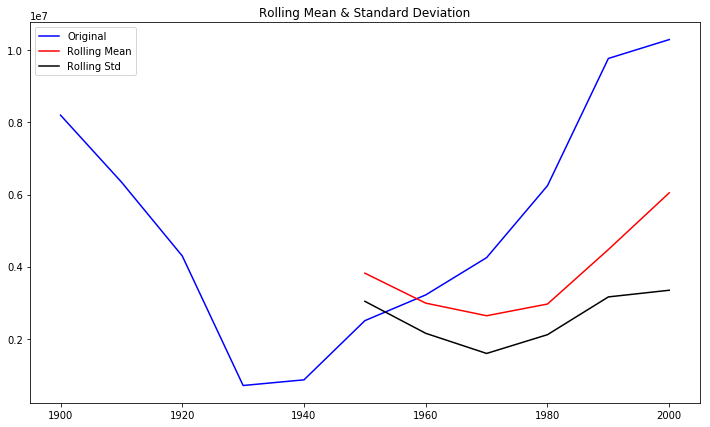

In [10]:
rolmean = total_immigration.rolling(window = 6, center = False).mean()
rolstd = total_immigration.rolling(window = 6, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Dickey-Fuller Test

## Question to research:
- How to interpret the Dickey Fuller numbers? / Results of Dickey-Fuller Test?

In [9]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(total_immigration)
# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(0.0, 0.958532086060056, 7, 3, {'1%': -10.41719074074074, '5%': -5.77838074074074, '10%': -3.391681111111111}, -111.37694164988635)


# Checking to see if stationary

In [25]:
# total_immigration = total_immigration.to_frame()

In [11]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 16, center = False).mean()
    rolstd = TS.rolling(window = 16, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Total_immigration_by_decade']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput2['Critical Value (%s)'%key] = value
    print (dfoutput2)

In [12]:
stationarity_check(total_immigration)

KeyError: 'Total_immigration_by_decade'

# Log transformation to minimize non-stationarity
## Question to research:
- Couldn't get the log transformation to work yet? Getting errors ; tried to convert series to np array but not working; come back to this

In [23]:
index = total_immigration.index

In [24]:
import numpy as np

In [25]:
type(total_immigration)

pandas.core.series.Series

In [26]:
immigration_array = total_immigration.as_matrix()
immigration_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([8202388, 6347380, 4295510, 699375, 856608, 2499268, 3213749,
       4248203, 6244379, 9775398, 10299430], dtype=object)

In [27]:
immigration_array= immigration_array.astype('int')
immigration_array

array([ 8202388,  6347380,  4295510,   699375,   856608,  2499268,
        3213749,  4248203,  6244379,  9775398, 10299430])

In [28]:
#go back to this not sure if it will be helpful to convert to log
# immigration_array = np.array(total_immigration)
# type(immigration_array)

In [29]:
data = pd.Series(np.log(immigration_array), index=index)
data

Decade_beginning
1900-01-01    15.919936
1910-01-01    15.663553
1920-01-01    15.273081
1930-01-01    13.457942
1940-01-01    13.660736
1950-01-01    14.731508
1960-01-01    14.982949
1970-01-01    15.262007
1980-01-01    15.647192
1990-01-01    16.095379
2000-01-01    16.147599
dtype: float64

Text(0, 0.5, 'log(Total_immigration_by_decade)')

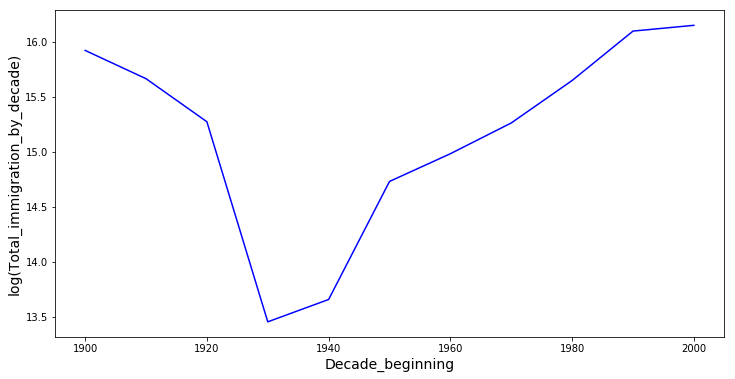

In [30]:
fig = plt.figure(figsize=(12,6))
plt.plot(data, color="blue")
plt.xlabel("Decade_beginning", fontsize=14)
plt.ylabel("log(Total_immigration_by_decade)", fontsize=14)
# plt.show()

In [33]:
data_df = data.to_frame()
data_df = data_df.rename(index=str, columns={0:'Total_immigration_by_decade'})
data_df

,Total_immigration_by_decade
Decade_beginning,
1900-01-01 00:00:00,15.919936
1910-01-01 00:00:00,15.663553
1920-01-01 00:00:00,15.273081
1930-01-01 00:00:00,13.457942
1940-01-01 00:00:00,13.660736
1950-01-01 00:00:00,14.731508
1960-01-01 00:00:00,14.982949
1970-01-01 00:00:00,15.262007
1980-01-01 00:00:00,15.647192


In [34]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-0.0, 0.958532086060056, 4, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, -206.3800590514453)


In [73]:
dfoutput

Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


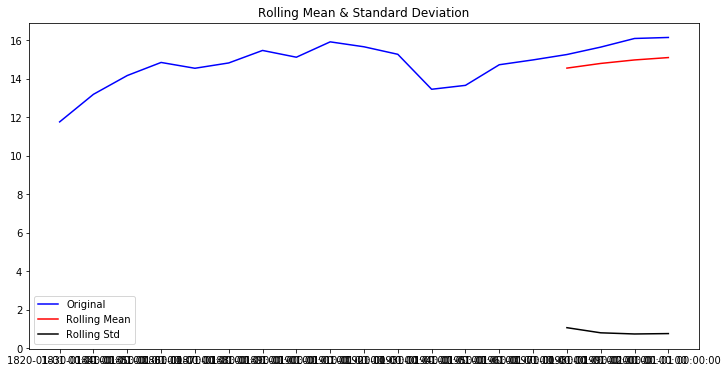

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [75]:
stationarity_check(data_df)

# Square Root transformation to minimize non-stationarity
## Question to research:
- Couldn't get to work. Getting errors ; tried to convert series to np array but not working; come back to this

Text(0, 0.5, 'sqrt(total_immigration)')

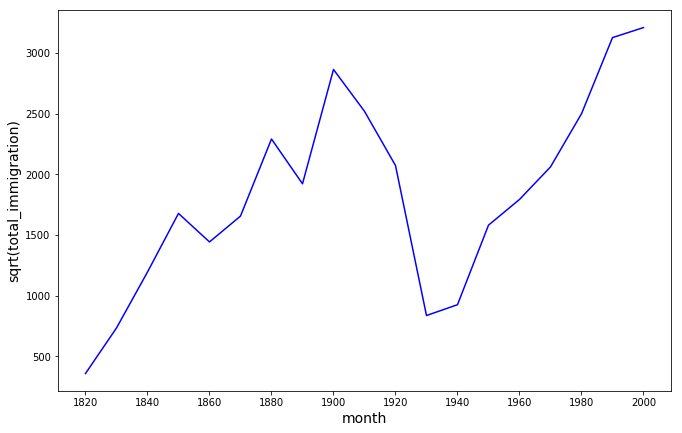

In [69]:
data_sqrt = pd.Series(np.sqrt(immigration_array), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data_sqrt, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(total_immigration)", fontsize=14)


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


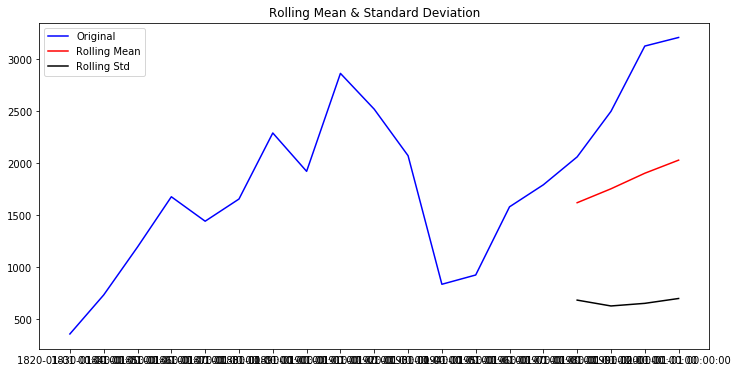

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [70]:
data_sqrt_df = data_sqrt.to_frame()
data_sqrt_df = data_sqrt_df.rename(index=str, columns={0:'Total_immigration_by_decade'})

stationarity_check(data_sqrt_df)

# Subtracting the rolling mean to check if time series is stationary

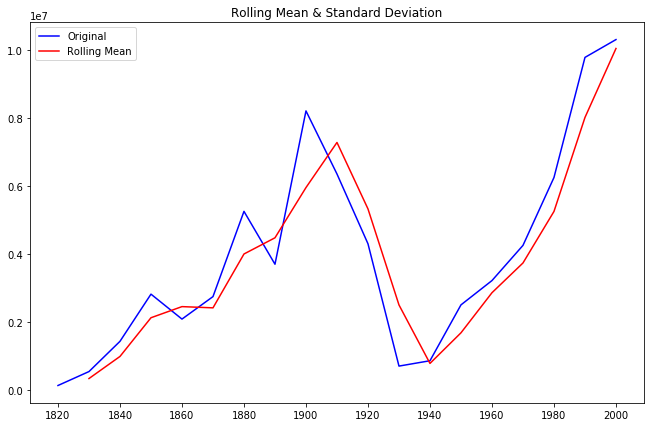

In [16]:
rolmean = total_immigration.rolling(window = 2).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
data_minus_rolmean = total_immigration - rolmean
data_minus_rolmean.head(15)

Decade_beginning
1820-01-01            NaN
1830-01-01         204940
1840-01-01         444478
1850-01-01         693608
1860-01-01        -366646
1870-01-01         330438
1880-01-01    1.25322e+06
1890-01-01        -777137
1900-01-01    2.25405e+06
1910-01-01        -927504
1920-01-01   -1.02594e+06
1930-01-01   -1.79807e+06
1940-01-01        78616.5
1950-01-01         821330
1960-01-01         357240
Name: Total_immigration_by_decade, dtype: object

In [18]:
data_minus_rolmean.dropna(inplace=True)

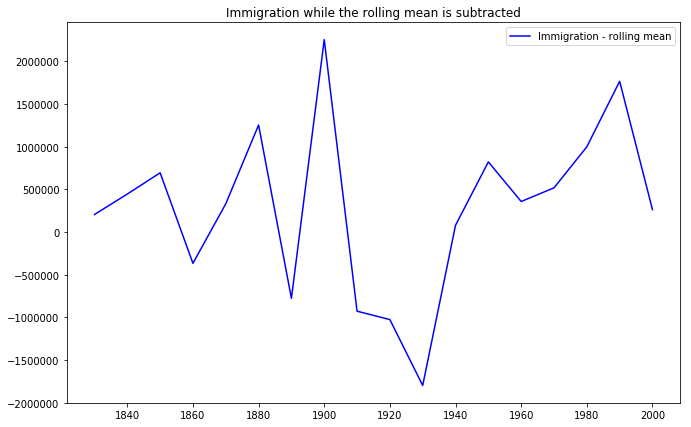

In [19]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the rolling mean is subtracted')
plt.show(block=False)

# The weighted rolling mean / weighted moving average
- More recent values are given a higher weight
- Below using Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor
    - the parameter ‘halflife’ is used to define the amount of exponential decay. 
    - Other parameters like span and center of mass can also be used to define decay
    - more info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

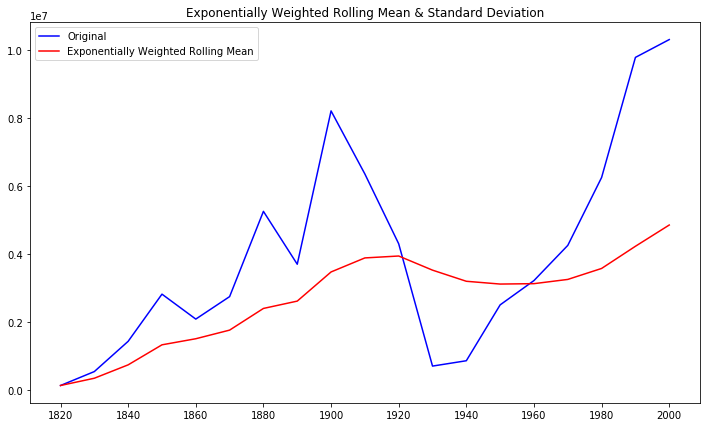

In [69]:
exp_rolmean = total_immigration.ewm(halflife = 8).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

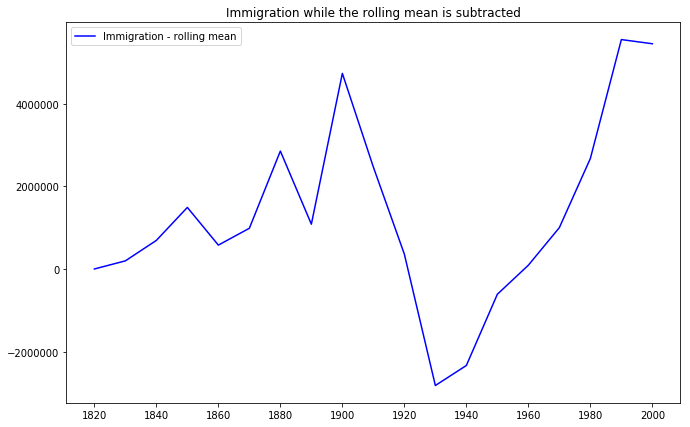

In [70]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = total_immigration - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Immigration while the rolling mean is subtracted')
plt.show(block=False)

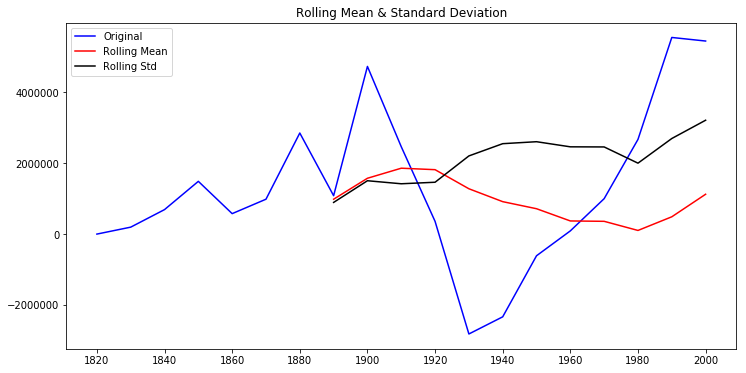

Results of Dickey-Fuller Test:
Test Statistic                 -0.000000
p-value                         0.958532
#Lags Used                      8.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [71]:
stationarity_check(data_minus_exp_rolmean)

# Differencing
- deal with both trend and seasonality 
- take the difference of an observation at a particular time instant with that at the previous instant (i.e. a co-called 1-period "lag")
## Question to research:
- How do you when you've differenced enough?

In [96]:
#twelve period lag
data_diff = data_minus_exp_rolmean.diff(periods=1)
data_diff.head(15)

,Total_immigration_by_decade
Decade_beginning,
1820-01-01,NaN
1830-01-01,196067
1840-01-01,495533
1850-01-01,798151
1860-01-01,-911867
1870-01-01,407267
1880-01-01,1.86918e+06
1890-01-01,-1.77007e+06
1900-01-01,3.65095e+06


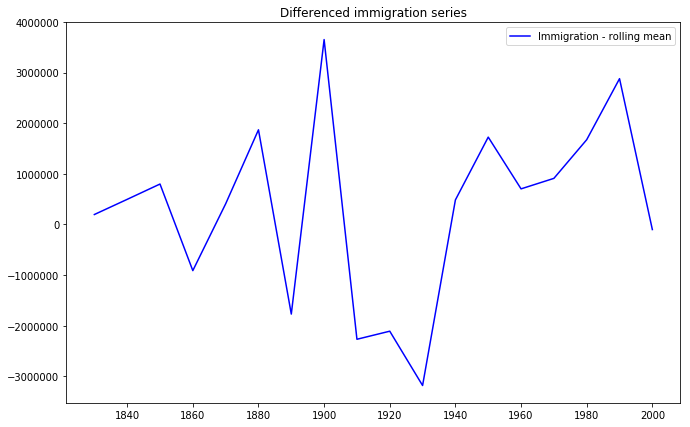

In [97]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)

In [98]:
data_diff = data_diff.dropna(inplace=True)

In [101]:
stationarity_check(data_diff)

AttributeError: 'NoneType' object has no attribute 'rolling'